<a href="https://colab.research.google.com/github/sameekshya1999/Face-Bluring-Tool/blob/main/Face_bluring_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

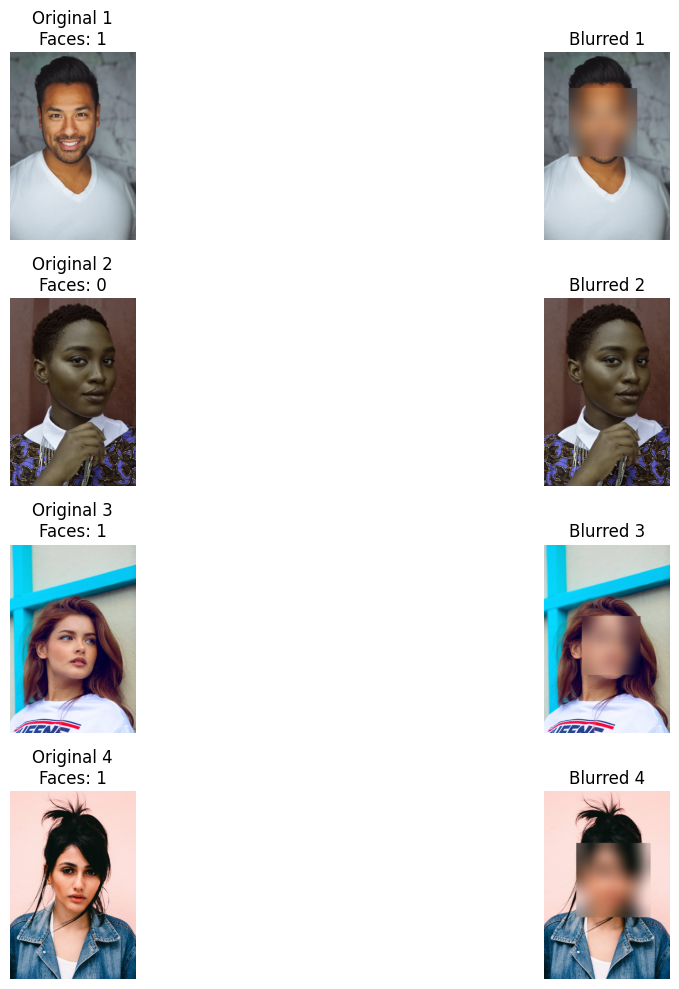

In [1]:
# Step 1: Install & Import Libraries
!pip install opencv-python numpy matplotlib requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Step 2: Load Haar Cascade (Pre-trained Face Detector)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 3: Define Face Blurring Function
def blur_faces(image_url):
    # Download image from URL
    response = requests.get(image_url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)

    # Detect faces
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Blur each face
    for (x, y, w, h) in faces:
        roi = img[y:y+h, x:x+w]
        roi = cv2.GaussianBlur(roi, (99, 99), 30)
        img[y:y+h, x:x+w] = roi

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), faces

# Step 4: Test on REAL Sample URLs (Free-to-use images)
sample_urls = [
    "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60",  # Portrait 1
    "https://images.unsplash.com/photo-1531123897727-8f129e1688ce?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60",  # Portrait 2
    "https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60",  # Portrait 3
    "https://images.unsplash.com/photo-1488426862026-3ee34a7d66df?ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"   # Portrait 4
]

# Step 5: Visualize Results
plt.figure(figsize=(15, 10))
for i, url in enumerate(sample_urls[:4]):  # Show all 4 images
    try:
        blurred_img, faces = blur_faces(url)
        original_img = cv2.cvtColor(cv2.imdecode(np.frombuffer(requests.get(url).content, np.uint8), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

        # Plot original vs blurred
        plt.subplot(4, 2, 2*i+1)
        plt.imshow(original_img)
        plt.title(f"Original {i+1}\nFaces: {len(faces)}")
        plt.axis('off')

        plt.subplot(4, 2, 2*i+2)
        plt.imshow(blurred_img)
        plt.title(f"Blurred {i+1}")
        plt.axis('off')
    except Exception as e:
        print(f"Error processing {url}: {e}")

plt.tight_layout()
plt.show()